#### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]


# MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df[df['Cabin'].isnull()]

# MNAR     ( cs there is a relation bw data missed and another value)( cannot ask cabin to dead bodies)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:

df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

##### Repalcing with median

In [9]:
med = df.Age.median()
df['Age_median'] = df['Age'].fillna(med)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [10]:
df.isna().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

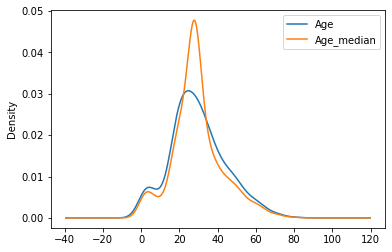

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

plt.show()

In [12]:
### function for median imputation

def impute_nan(df,variable,median):
    df[variable+'median'] = df[variable].fillna(median)

In [13]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

median = df.Fare.median()


In [14]:
impute_nan(df,'Fare',median)
df

,Survived,Age,Fare,Faremedian
0,0,22.0,7.2500,7.2500
1,1,38.0,71.2833,71.2833
2,1,26.0,7.9250,7.9250
3,1,35.0,53.1000,53.1000
4,0,35.0,8.0500,8.0500
...,...,...,...,...
886,0,27.0,13.0000,13.0000
887,1,19.0,30.0000,30.0000
888,0,NaN,23.4500,23.4500
889,1,26.0,30.0000,30.0000


In [15]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


#### 2. Random Sample Imputation


In [16]:
# random sample set

random_sample_count = df['Age'].isna().sum()

random_samples = df['Age'].dropna().sample(random_sample_count,random_state=0)
random_samples

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [17]:
# random sample indices
random_samples.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [18]:
# non NA indices

df[df["Age"].isna()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
# changing index of randsom sample

random_samples.index = df[df["Age"].isna()].index
random_samples

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
# assigning random sample set, whose index is same as that of NAN elements TO NAN set

df.loc[df['Age'].isna(),'Age'] = random_samples

In [21]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [22]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,15.0,23.4500
889,1,26.0,30.0000


In [23]:
# function

def random_sample_imputation(df,variable):
    df[variable+'_random'] = df[variable]
    random_samples = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    random_samples.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(),variable+'_random'] = random_samples


In [24]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

random_sample_imputation(df,'Age')

In [25]:
random_sample_imputation(df,"Age")

In [26]:
df

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,15.0
889,1,26.0,30.0000,26.0


In [27]:
# combined function

def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_samples = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    random_samples.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(),variable+'_random'] = random_samples


# def impute_nan(df,variable,median):
#     df[variable+"_median"] = df[variable].fillna(median)
#     df[variable+"_random"]=df[variable]
#     random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
#     random_sample.index=df[df[variable].isnull()].index
#     df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [28]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

median = df.Age.median()

impute_nan(df,'Age',median)

In [30]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:ylabel='Density'>

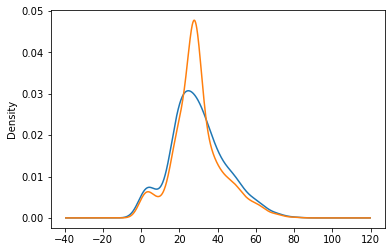

In [34]:
df["Age"].plot(kind='kde')
df["Age_median"].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

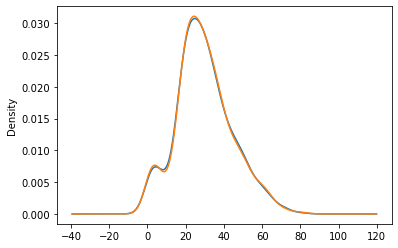

In [41]:
df["Age"].plot(kind='kde')
# df["Age_median"].plot(kind='kde')
df["Age_random"].plot(kind='kde')

##### 3.  Capturing NAN values with a new feature


In [3]:
df =  pd.read_csv('titanic.csv',usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
np.where(df['Age'].isnull(),1,0)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [10]:
df['Age_NaN'] = np.where(df["Age"].isnull(),1,0)
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [12]:
df['Age_NaN'] = np.where(df["Age"].isnull(),1,0)
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### 4. End of Distribution imputation

In [14]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:ylabel='Frequency'>

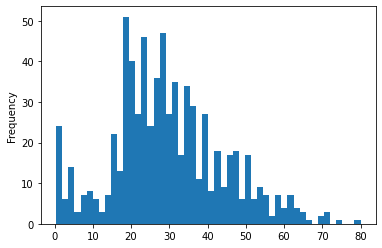

In [17]:
df['Age'].plot(kind='hist',bins=50)

<AxesSubplot:>

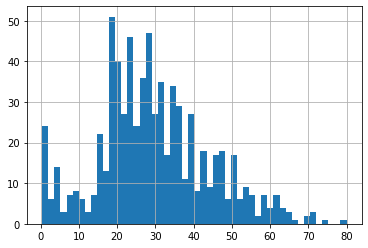

In [20]:
df.Age.hist(bins=50)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

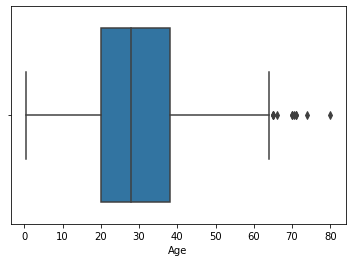

In [23]:
# checking for outliers
sns.boxplot("Age",data=df)


In [28]:
mean = df['Age'].mean()

In [29]:
std = df['Age'].std()

In [32]:
extreme = mean + 3*std
extreme

73.27860964406095

In [35]:
df['Age_Extreme'] = df['Age'].fillna(extreme)
df

,Survived,Age,Fare,Age_Extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_Extreme'>

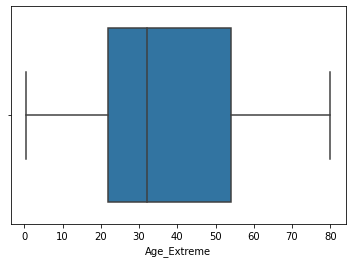

In [37]:
sns.boxplot('Age_Extreme',data=df)

#### 5. Arbitrary Value Imputation


In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
df=pd.read_csv("loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

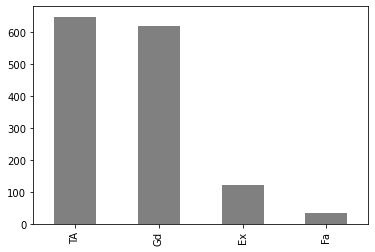

In [7]:
df.BsmtQual.value_counts().plot.bar(color='grey')

In [8]:
df['BsmtQual'].mode()[0]

'TA'

<AxesSubplot:>

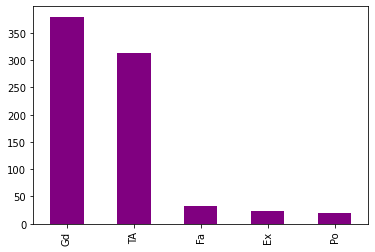

In [9]:
df.FireplaceQu.value_counts().plot.bar(color='purple')

In [10]:
df['FireplaceQu'].mode()[0]

'Gd'

<AxesSubplot:>

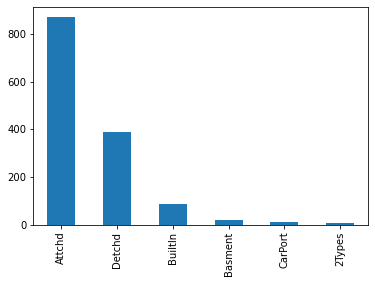

In [11]:
df.GarageType.value_counts().plot.bar()

In [12]:
df['GarageType'].mode()[0]

'Attchd'

In [13]:
#function for imputing most frequent value for Nan values

def impute_nan(df,variable):
    mF = df[variable].mode()[0]

    df[variable].fillna(mF,inplace=True)

In [14]:

impute_nan(df,"GarageType")

In [15]:
df['GarageType'].isna().sum()

0

<AxesSubplot:>

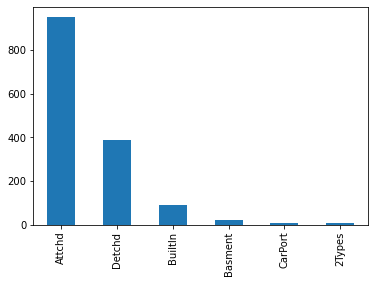

In [16]:
df.GarageType.value_counts().plot.bar()

In [24]:
#calling from forloop

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [27]:
df.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [28]:
# if we have more frquent NaN valuess , we put them in a new category( others, None , Missing etc.) even if its 30% missing

df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])



In [31]:
df["FireplaceQu"].fillna('others',inplace=True)

In [33]:
df["FireplaceQu"].unique()

array(['others', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

<AxesSubplot:>

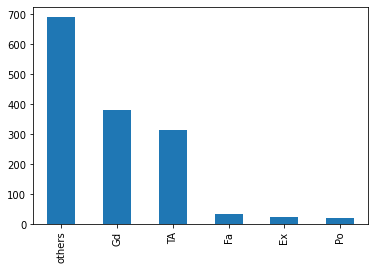

In [42]:
df["FireplaceQu"].value_counts().plot.bar()

## Handle Categorical Features

### Nominal Number Encoding

#### One Hot Encoding

In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv',usecols=['Sex'])
df.columns

Index(['Sex'], dtype='object')

In [53]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [58]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [59]:
#one hot encoding

pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [68]:
df = pd.read_csv('titanic.csv')

In [75]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [69]:
pd.get_dummies(df,columns=['Sex']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [70]:
pd.get_dummies(df["Sex"]).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [71]:
# wrongXXXX    pd.get_dummies(df["Sex","Embarked"]).head()

In [73]:
pd.get_dummies(df,columns=['Sex','Embarked']).head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0


In [74]:
# to avoid 1 colmn
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0


In [1]:
# pd.get_dummies(df,columns=['Sex','Embarked'],drop_last=True).head(2)

#### Onehotencoding with many categories in a feature

In [105]:
pd.read_csv('mercedes.csv')

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [4]:
len(df.X0.unique())

47

In [5]:
# pd.get_dummies(df)  -- dimensionality problem# so we r taking another approach


# for loop to show uniques in each column

for i in df.columns:
    print('for column',i,'The no of unique labels is',len(df[i].unique()))

for column X0 The no of unique labels is 47
for column X1 The no of unique labels is 27
for column X2 The no of unique labels is 44
for column X3 The no of unique labels is 7
for column X4 The no of unique labels is 4
for column X5 The no of unique labels is 29
for column X6 The no of unique labels is 12


In [6]:
# approach is to select the most common 10 Cat Features 
# only if unique is > 15 it needs to be  selected x0,x1,x2,x5

print(df["X0"].value_counts().sort_values(ascending=False).head(10))
print(df["X1"].value_counts().sort_values(ascending=False).head(10))
print(df["X2"].value_counts().sort_values(ascending=False).head(10))
print(df["X5"].value_counts().sort_values(ascending=False).head(10))



z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64
w    231
v    231
q    220
r    215
s    214
d    214
n    212
p    208
m    208
i    207
Name: X5, dtype: int64


In [7]:
X0_10 = list(df["X0"].value_counts().head(10).index)
X1_10 = list(df["X1"].value_counts().head(10).index)
X2_10 = list(df["X2"].value_counts().head(10).index)
X5_10 = list(df["X5"].value_counts().head(10).index)



In [8]:
print(len(X0_10))
print(len(X1_10))
print(len(X2_10))
print(len(X5_10))


10
10
10
10


In [9]:
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [10]:
for i in X0_10:
    df[i]=np.where(df["X0"]==i,1,0)

for i in X1_10:
    df[i]=np.where(df["X1"]==i,1,0)
    
for i in X2_10:
    df[i]=np.where(df["X2"]==i,1,0)
    
for i in X5_10:
    df[i]=np.where(df["X5"]==i,1,0)
    
    
    

In [15]:
df.drop(['X0','X1','X2','X5'],axis=1,inplace=True)

In [16]:
df

,X3,X4,X6,z,ak,y,ay,t,x,o,...,a,c,as,ae,ai,m,e,q,d,p
0,a,d,j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e,d,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c,d,j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f,d,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,f,d,d,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,c,d,d,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,d,d,h,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4206,a,d,g,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,f,d,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Count or Frequency Encoding

In [76]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()      

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
# Droping the first column
train_set.drop(0,axis=1,inplace=True)

In [78]:
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]

In [79]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [80]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [81]:
train_set.columns

Index(['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [82]:
for i in train_set.columns:
    print(i,":",len(train_set[i].unique()),"Labels")

Employment : 9 Labels
Degree : 16 Labels
Status : 7 Labels
Designation : 15 Labels
family_job : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [83]:
country_map = train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [84]:
train_set["Country"] = train_set["Country"].map(country_map)
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


#### Target Guided Ordinal Encoding

In [36]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [23]:
df['Cabin'].fillna("Missing",inplace=True)
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [24]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [25]:
df['Cabin'].astype(str).str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [26]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [27]:
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [28]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [29]:
ordinlabels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinlabels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [30]:
# dict with kew [A,B...] and valu [1,2,3...8]

In [31]:
dictnew = {}
for i,k in enumerate(ordinlabels,1):
    # print(i)
    # print(k)
    # print("-------------")
    dictnew[k]=i

dictnew

{'T': 1, 'M': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}

In [32]:
# or

ordlabels2 = {k:i for i,k in enumerate(ordinlabels,1)}

ordlabels2

{'T': 1, 'M': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}

In [33]:
# df['Cabin_ordinal_labels']=df['Cabin'].map(ordlabels2)
# df.head()

In [34]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordlabels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,2
1,1,C,5
2,1,M,2
3,1,C,5
4,0,M,2


#### Mean Encoding with targets

In [43]:

df['Cabin'].fillna("Missing",inplace=True)

df['Cabin'] = df['Cabin'].astype(str).str[0]

mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

mean_ordinal


{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [44]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()


,Survived,Cabin,mean_ordinal_encode
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


SCALING

##### Standardization


In [47]:
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [63]:
df.Age.fillna(df.Age.median(),inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [64]:
# sklearn                 - bible of ML 


from sklearn.preprocessing import StandardScaler
     #module  #class               #function


sc = StandardScaler()

In [65]:
sc.fit_transform(df)

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [66]:
sc_df = sc.fit_transform(df)                 # scaled df = sc_df

scaled_df = pd.DataFrame(sc_df)

scaled_df.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [67]:
df.describe()         #for comparison

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [68]:
# scaled_df[3].mean()

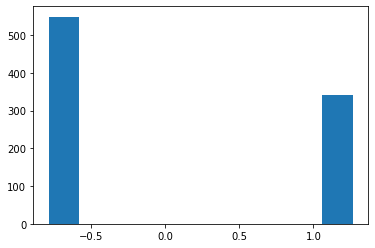

In [69]:
# plotting

plt.hist(scaled_df[0])
plt.show()


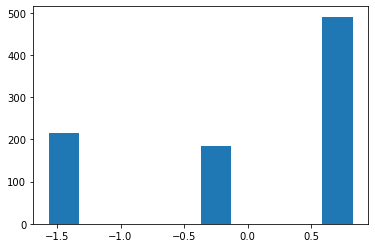

In [70]:
plt.hist(scaled_df[1])
plt.show()

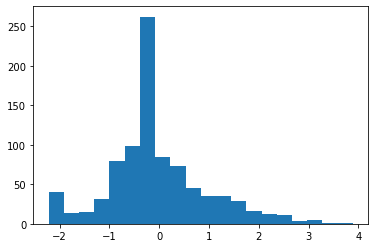

In [71]:
# plt.hist(scaled_df[2],bins=20)
plt.hist(scaled_df[2],bins=20)
plt.show()

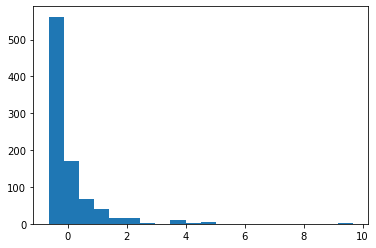

In [74]:
plt.hist(scaled_df[3],bins=20)
plt.show()

##### Min Max Scaling  


In [75]:
df  = pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])

In [77]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [80]:
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isna().sum()

0

In [82]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [86]:
min_max_df = min_max.fit_transform(df)
scaled_df = pd.DataFrame(min_max_df)
scaled_df.head(2)

,0,1,2,3
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136


In [87]:
scaled_df.describe()

,0,1,2,3
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.363679,0.062858
std,0.486592,0.418036,0.163605,0.096995
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.015440
50%,0.000000,1.000000,0.346569,0.028213
75%,1.000000,1.000000,0.434531,0.060508
max,1.000000,1.000000,1.000000,1.000000


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

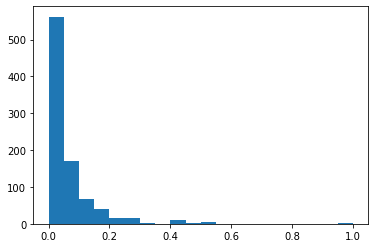

In [90]:
plt.hist(scaled_df[3],bins=20)

Robust SCalar

In [91]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()

In [96]:
robust_df = robust.fit_transform(df)
scaled_df = pd.DataFrame(robust_df,columns=df.columns)
scaled_df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,-0.691358,0.104737,0.768745
std,0.486592,0.836071,1.001515,2.152200
min,0.000000,-2.000000,-2.121538,-0.626005
25%,0.000000,-1.000000,-0.461538,-0.283409
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.538462,0.716591
max,1.000000,0.000000,4.000000,21.562738


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

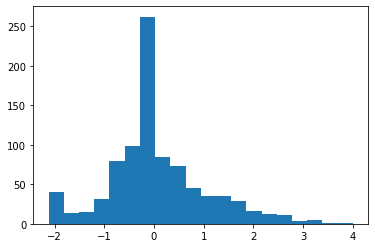

In [98]:
plt.hist(scaled_df['Age'],bins=20)

### Gaussian Distribution / Normal distribution

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
# if Normally distributed, mean=med=mode , mean=0 , std = 1

#### Q-Q plot  - to check

In [103]:
# import scipy.stats as stat
# import pylab

In [105]:
df  = pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.isna().sum()


Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [107]:
df.Age.fillna(df.Age.median(),inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [111]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
robust_df=robust.fit_transform(df)
scaled_df = pd.DataFrame(robust_df,columns=df.columns)
scaled_df.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


In [113]:
# QQ PLOT


import scipy.stats as stat
import pylab



def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

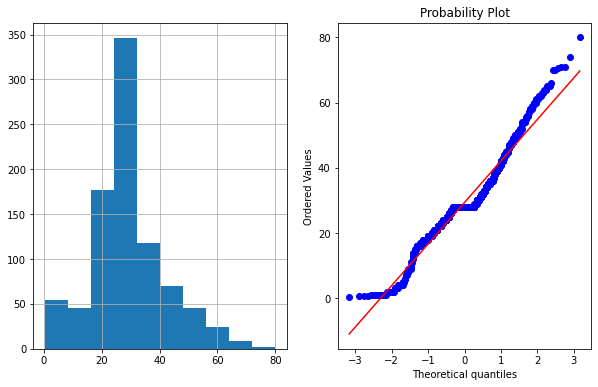

In [114]:
plot_data(df,'Age')            # need adjustmnets

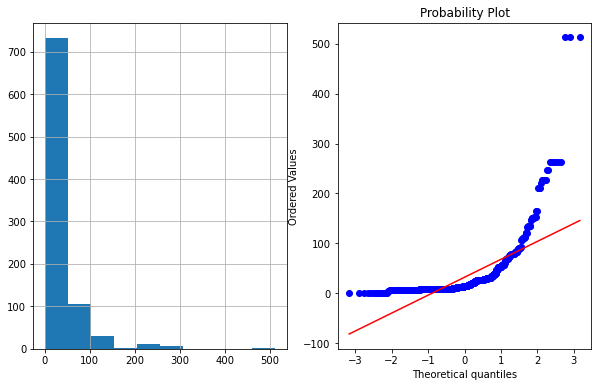

In [115]:
plot_data(df,'Fare')               # not ND

In [ ]:
# trying to make into bell curve ( ie, trying to make the red line and blue curve inline) = methods:
# - logarithmic transformation
# - reciprocal transformation
# - square root transformation
# - exponential transformation (more general, you can use any exponent)
# - boxcox transformation

##### Logarithmic transformation


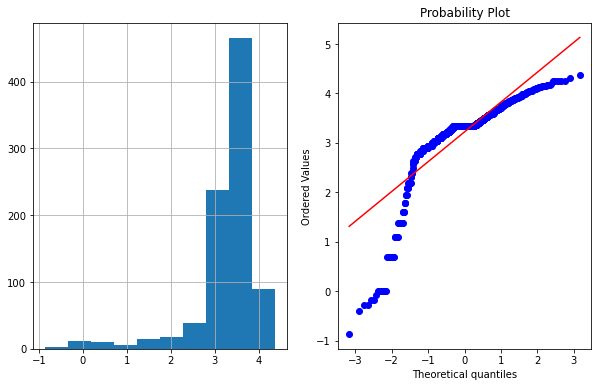

In [121]:
import numpy as np
df['Age_log']=np.log(df['Age'])


plot_data(df,'Age_log')           # log not good for age


c:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 6.238967387173662] is not finite

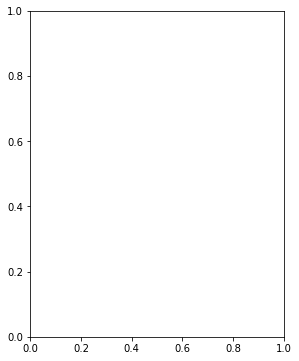

In [122]:
df['Fare_log']=np.log(df['Fare'])


plot_data(df,'Fare_log')

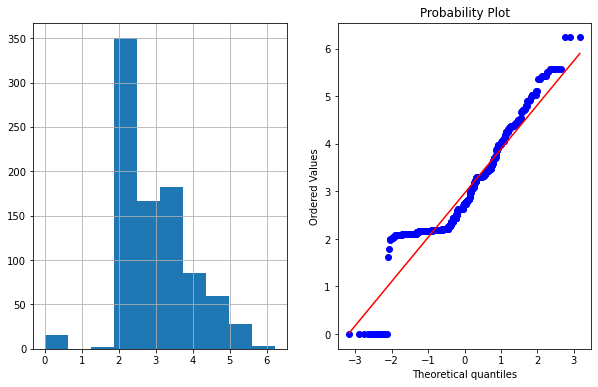

In [125]:
df['Fare_log']=np.log1p(df['Fare'])


plot_data(df,'Fare_log')

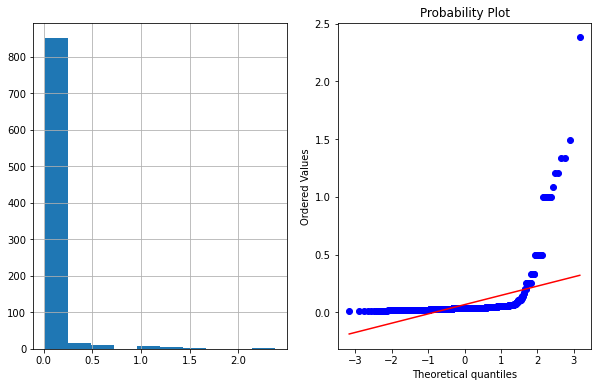

In [126]:
#### Reciprocal Transformation

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

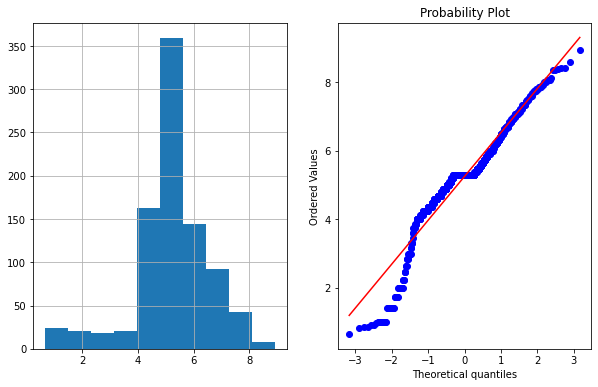

In [127]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

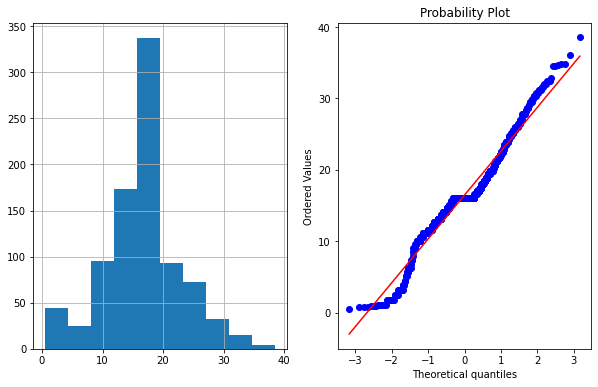

In [128]:
#### Exponential Transformation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCox Transformation

In [129]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [130]:
print(parameters)

0.7964531473656952


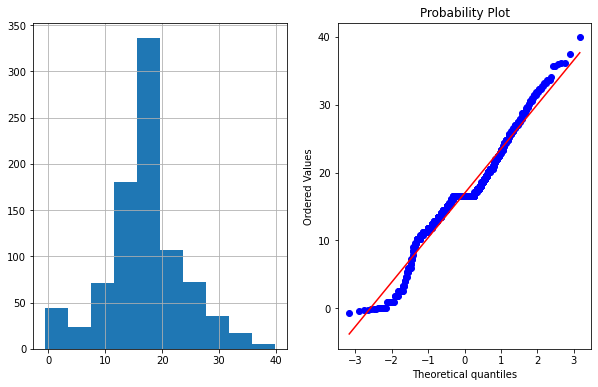

In [132]:
plot_data(df,'Age_Boxcox')